# A computational Spatial Heterodyne Spectrograph (SHS) model for simulating 2D Interferograms

In [1]:
#importing the necessary libraries and packages

import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.optimize import curve_fit
from scipy.signal import find_peaks
from astropy.io import fits

import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.optimize import curve_fit
from scipy.signal import find_peaks
from astropy.io import fits
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d  # Updated import statement
import numpy as np
import random
import matplotlib.pyplot as plt
import math
import cmath
import numpy as np
import scipy
from scipy.fft import fft, fftshift, ifft, fftfreq

# Below are tables to help with fits file selection based on spectral type of star

$$
\begin{aligned}
& \text {Table 1. Naming convention for files corresponding to various spectral types.}\\
&\begin{array}{cccc}
\hline \hline \text { SPECTRUM ID NO. } & \text {  SPECTRAL TYPES AND LUMINOSITY CLASS  } \\
\hline 1-45 & O5-M6 V \\
46-59 & B2-K3 IV \\
60-105 & O8-M10 III \\
106-113 & B2-M3 II \\
114-131 & B0-M2 I \\
\hline
\end{array}
\end{aligned}
$$

$$
\begin{aligned}
& \text {Table 2. Naming convention for files corresponding to various spectral types }\\
&\begin{array}{cccc}
\hline \hline \text { SPECTRUM ID NO. } & \text {  SPECTRAL TYPES AND LUMINOSITY CLASS  } \\
\hline pickles\_uk\_1 & O5V \\
pickles\_uk\_2 & O9V \\
pickles\_uk\_3 & B0V \\
pickles\_uk\_4 & B1V \\
pickles\_uk\_5 & B3V \\
pickles\_uk\_6 & B5-7V \\
pickles\_uk\_7 & B8V \\
pickles\_uk\_9 & A0V \\
pickles\_uk\_10 & A2V \\
pickles\_uk\_11 & A3V \\
pickles\_uk\_12 & A5V \\
pickles\_uk\_14 & F0V \\
pickles\_uk\_15 & F2V \\
pickles\_uk\_16 & F5V \\
pickles\_uk\_20 & F8V \\
pickles\_uk\_23 & G0V \\
pickles\_uk\_26 & G2V \\
pickles\_uk\_27 & G5V \\
pickles\_uk\_30 & G8V \\
pickles\_uk\_31 & K0V \\
pickles\_uk\_33 & K2V \\
pickles\_uk\_36 & K5V \\
pickles\_uk\_37 & K7V \\
pickles\_uk\_38 & M0V \\
pickles\_uk\_40 & M2V \\
pickles\_uk\_43 & M4V \\
pickles\_uk\_44 & M5V \\
pickles\_uk\_46 & B2IV \\
pickles\_uk\_47 & B6IV \\
pickles\_uk\_48 & A0IV \\
pickles\_uk\_49 & A4-7IV \\
pickles\_uk\_50 & F0-2IV \\
pickles\_uk\_51 & F5IV \\
pickles\_uk\_52 & F8IV \\
pickles\_uk\_53 & G0IV \\
pickles\_uk\_54 & G2IV \\
pickles\_uk\_55 & G5IV \\
pickles\_uk\_56 & G8IV \\
pickles\_uk\_57 & K0IV \\
pickles\_uk\_58 & K1IV \\
pickles\_uk\_59 & K3IV \\
pickles\_uk\_60 & O8III \\
pickles\_uk\_61 & B1-2III \\
pickles\_uk\_63 & B5III \\
pickles\_uk\_64 & B9III \\
pickles\_uk\_65 & A0III \\
pickles\_uk\_67 & A5III \\
pickles\_uk\_69 & F0III \\
pickles\_uk\_71 & F5III \\
pickles\_uk\_72 & G0III \\
pickles\_uk\_73 & G5III \\
pickles\_uk\_76 & G8III \\
pickles\_uk\_78 & K0III \\
pickles\_uk\_87 & K3III \\
pickles\_uk\_93 & K5III \\
pickles\_uk\_95 & M0III \\
pickles\_uk\_100 & M5III \\
pickles\_uk\_105 & M10III \\
pickles\_uk\_106 & B2II \\
pickles\_uk\_107 & B5II \\
pickles\_uk\_108 & F0II \\
pickles\_uk\_109 & F2II \\
pickles\_uk\_110 & G5II \\
pickles\_uk\_111 & K0-1II \\
pickles\_uk\_112 & K3-4II \\
pickles\_uk\_113 & M3II \\
pickles\_uk\_114 & B0I \\
pickles\_uk\_117 & B5I \\
pickles\_uk\_118 & B8I \\
pickles\_uk\_119 & A0I \\
pickles\_uk\_121 & F0I \\
pickles\_uk\_122 & F5I \\
pickles\_uk\_123 & F8I \\
pickles\_uk\_124 & G0I \\
pickles\_uk\_126 & G5I \\
pickles\_uk\_127 & G8I \\
pickles\_uk\_128 & K2I \\
pickles\_uk\_130 & K4I \\
pickles\_uk\_131 & M2I \\
\hline
\end{array}
\end{aligned}
$$


In [2]:
# accessing and downloading the required fits file for analysis and simulation

import requests  # Import the requests library to handle HTTP requests

# Define the URL of the file to be downloaded
url = 'https://archive.stsci.edu/hlsps/reference-atlases/cdbs/grid/pickles/dat_uvi/pickles_15.fits'

# Send an HTTP GET request to the URL, allowing redirects
r = requests.get(url, allow_redirects=True)

# Open a local file named 'pickles_ttt.fits' in write-binary mode
# Write the content of the response to this file
open('pickles_15.fits', 'wb').write(r.content)

#running this code more than once for the same fits file will lead to error

ModuleNotFoundError: No module named 'requests'

<>:12: SyntaxWarning: invalid escape sequence '\A'
<>:13: SyntaxWarning: invalid escape sequence '\A'
<>:12: SyntaxWarning: invalid escape sequence '\A'
<>:13: SyntaxWarning: invalid escape sequence '\A'
C:\Users\user\AppData\Local\Temp\ipykernel_12908\3327732471.py:12: SyntaxWarning: invalid escape sequence '\A'
  plt.xlabel('Wavelength in $\AA$')
C:\Users\user\AppData\Local\Temp\ipykernel_12908\3327732471.py:13: SyntaxWarning: invalid escape sequence '\A'
  plt.ylabel('Intensity in erg/s/$cm^2$/$\AA$')


ColDefs(
    name = 'WAVELENGTH'; format = '1E'; unit = 'angstroms'; disp = 'G15.7'
    name = 'FLUX'; format = '1E'; unit = 'flam'; disp = 'G15.7'
)


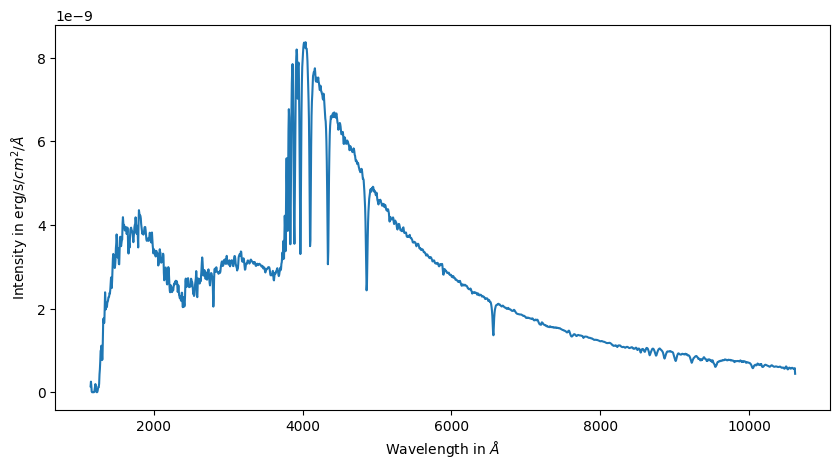

In [3]:
# plotting the raw fits file

hdul = fits.open('C:/Users/user/Downloads/pickles_10.fits')
print(hdul[1].columns)

spec = hdul[1].data['FLUX']
waves = hdul[1].data['WAVELENGTH']

fig = plt.figure()
fig.set_size_inches(10, 5)

plt.xlabel('Wavelength in $\AA$')
plt.ylabel('Intensity in erg/s/$cm^2$/$\AA$')
plt.plot(waves, spec)
plt.show()


<>:47: SyntaxWarning: invalid escape sequence '\A'
<>:48: SyntaxWarning: invalid escape sequence '\A'
<>:47: SyntaxWarning: invalid escape sequence '\A'
<>:48: SyntaxWarning: invalid escape sequence '\A'
C:\Users\user\AppData\Local\Temp\ipykernel_12908\761341468.py:47: SyntaxWarning: invalid escape sequence '\A'
  plt.xlabel('Wavelength in $\AA$', fontsize=15)
C:\Users\user\AppData\Local\Temp\ipykernel_12908\761341468.py:48: SyntaxWarning: invalid escape sequence '\A'
  plt.ylabel('Intensity in $W/m^2/\AA$',fontsize=15)


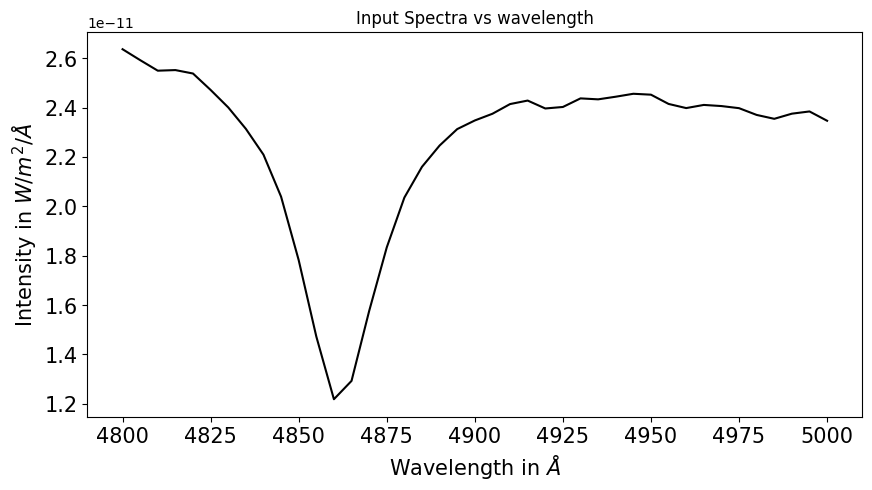

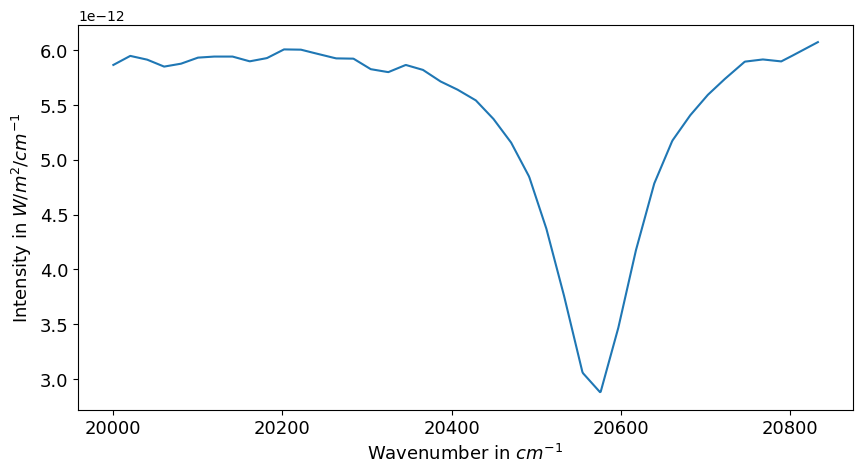

1000 length of interpolated spectral data array
0.07353564372599365
4.213282029277108     littrow angle in degrees
204
0.8329999999999977
0.4153743973814456     xmax in cm
4.084967320261449    low res wave number spacing
0.004072298013543584    low res sample spacing


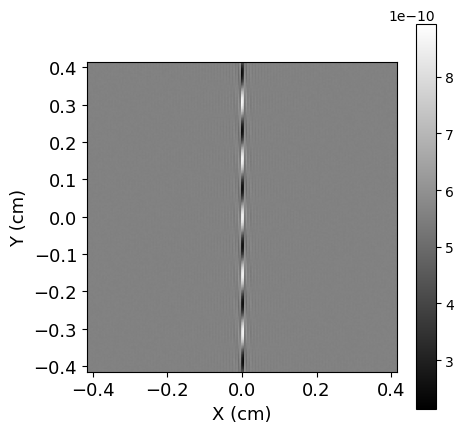

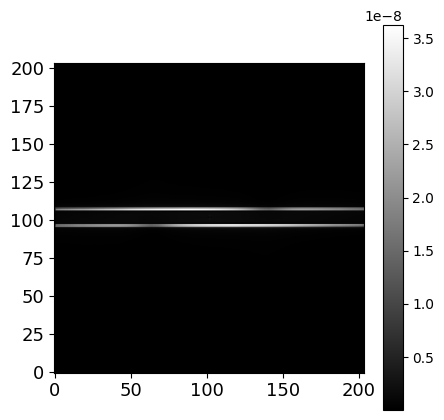

0.07353564372599365
4.213282029277108     littrow angle in degrees
204
0.8329999999999977
0.4153743973814456     xmax in cm
4.084967320261449    low res wave number spacing
0.004072298013543584    low res sample spacing
0.07353564372599365
4.213282029277108     littrow angle in degrees
204
0.8329999999999977
0.4153743973814456     xmax in cm
4.084967320261449    low res wave number spacing
0.004072298013543584    low res sample spacing


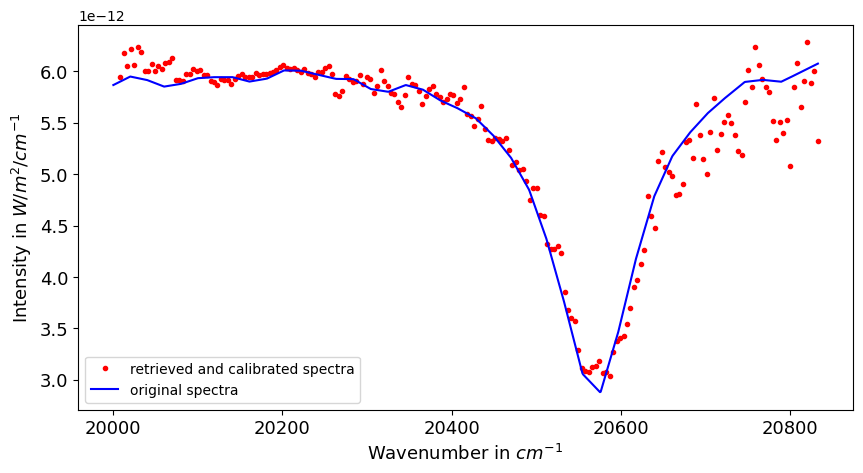

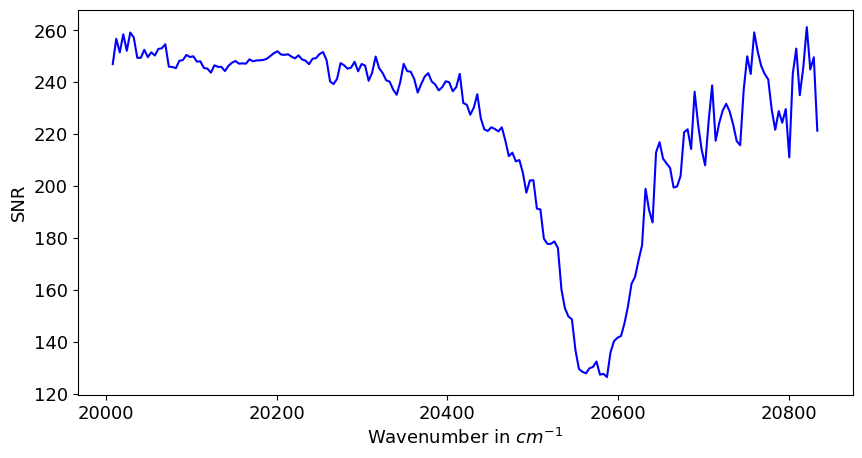

In [4]:
#The main code

################################################################################

## Converting the units from intensity to specific intensity by dividing with the FOV of pickles instrument
# 1 steradian = 4.25 * 10**10 arc sec^2 = 3282 deg**2
# pickles FOV = 20 arc sec by 10 arc sec = 200 arc sec^2
sr_arc = 4.25*(10**10)     #steradian to arc sec square
sr_deg = 3282      #steradian to degree square
pickles_FOV = 200/sr_arc
spec = spec/pickles_FOV
## now we willmultiply the FOV of our SHS which is 5 degree square
shs_FOV = (10**3)/sr_arc
spec = spec*shs_FOV

################################################################################
## scooping out the band of interest as asked by the user
################################################################################################################################
## Ask for input here
l_min = 4800#5160#float(input('enter the min wavelength in A    '))
l_max = 5000#5250#float(input('enter the max wavenumber in A    '))
R = 5000#float(input('enter the required resolution    '))
m = 3#float(input('enter the order you want to work in    '))   ## = 1
A_a = 0.3#float(input('entire aperture area   '))
d = 0.001#float(input('enter the wedge spacing in grating    '))
T = 400#float(input('enter a exposure time in seconds (>100s recommended)   '))

################################################################################################################################
## we want to focus on the lines at the middle which are very strong so we take data in that regime
sub_i = np.where((waves>=l_min) & (waves<=l_max))
wavelength = waves[sub_i]
spectral_radiance = spec[sub_i]

h=6.26*(10**(-34))  #Js
c=3*(10**8) # speed of light (m/s)
kB=1.38*(10**(-23)) # Boltzman constant (J/K)

sub_spec_1 = spectral_radiance#*(10**(-17)) #in erg/s/cm2/A
sub_spec_2 = 10**(-7)*sub_spec_1 #in W/cm2/A
sub_spec_3 = (10**4)*sub_spec_2 #in W/m2/A

fig = plt.figure()
fig.set_size_inches(10, 5)
plt.title('Input Spectra vs wavelength')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Wavelength in $\AA$', fontsize=15)
plt.ylabel('Intensity in $W/m^2/\AA$',fontsize=15)
plt.plot(wavelength,sub_spec_3,'k-')
plt.show()

################################################################################
## properly scaling and editing the input for use in SHS
scale = np.array([(i**2)*(10**(-8)) for i in wavelength])
K =[(1/l)*(10**8) for l in wavelength]
y = sub_spec_3 * scale #* amp ##this last term is for scaling

from scipy import interpolate
temp = interpolate.interp1d(K, y)
xnew = np.linspace(K[0], K[-1], 1000)
ynew = temp(xnew)

K_og = xnew
y_corr_og = ynew
d_k = np.diff(K_og)


fig = plt.figure()
fig.set_size_inches(10, 5)
plt.xlabel('Wavenumber in $cm^{-1}$', fontsize=13)
plt.ylabel('Intensity in $W/m^2/cm^{-1}$',fontsize=13)
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)
plt.plot(xnew,ynew,'-')
plt.show()
print(len(ynew),'length of interpolated spectral data array')

################################################################################

kmax = max(K_og)
kmin = min(K_og)
kL = (kmax+kmin)/2

N_high = (kmax-kmin)
N_high = math.ceil(N_high)

################################################################################
## thorlabs components
## 1
import matplotlib.pyplot as plt
import numpy as np
data = np.loadtxt('C:/Users/user/Downloads/entrance and exit transmission.txt',skiprows=1)
wavelength_ee = data[:, 0]  # Access the first column
transmission_ee = data[:, 1]  # Access the second column
# Repeat for other columns as needed
wavelength_ee = np.array(wavelength_ee)*10000
wavenumber_ee = [(1/l)*(10**8) for l in wavelength_ee]
transmission_ee =np.array(transmission_ee)/100
#print('wavelegth in Angstrom', 'transmission normalized as a fraction')
#for i in range(len(wavelength)):
 #   plt.scatter(wavelength[i], transmission[i])
#plt.show()
#plt.plot(wavelength_ee,transmission_ee)
#plt.show()
#plt.plot(wavenumber_ee,transmission_ee)
#plt.show()
##2
import matplotlib.pyplot as plt
import numpy as np
data = np.loadtxt('C:/Users/user/Downloads/beam splitter trans.txt')
wavelength = data[:, 0]  # Access the first column
transmission_P = data[:, 1]  # Access the second column
transmission_S = data[:, 2]
# Repeat for other columns as needed
wavelength_BS = np.array(wavelength)*10
wavenumber_BS = [(1/l)*(10**8) for l in wavelength_BS]
transmission_BS = (np.array(transmission_P)+np.array(transmission_S))/200
#print('wavelegth in Angstrom', 'transmission normalized as a fraction')
#for i in range(len(wavelength_BS)):
 #   plt.scatter(wavelength_BS[i], transmission_BS[i])
#plt.show()
#plt.plot(wavelength_BS, transmission_BS)
#plt.show()
#plt.plot(wavenumber_BS, transmission_BS)
#plt.show()
################################################################################
##SHS
h=6.26*(10**(-34))  #Js
c=3*(10**8) # speed of light (m/s)
kB=1.38*(10**(-23)) # Boltzman constant (J/K)
################################################################################
#T_H = 380 ##K
#T_C = 300 ##K
################################################################################
## Planck distribution fxn
def plank_corr(k,T):
    return 100*2*h*(c**2)*((100*k)**3)/(math.e**((h*c*100*k)/(kB*T))-1) ## *100 is given to make cm-1 to m-1
################################################################################
################################################################################

inter_ee = interpolate.interp1d(wavenumber_ee,transmission_ee)
Tr_ee = inter_ee(K_og)
L_blbo_1 = np.array([plank_corr(k, 290) for k in K_og])
inter_BS = interpolate.interp1d(wavenumber_BS,transmission_BS)
Tr_BS = inter_BS(K_og)

################################################################################
################################################################################
################################################################################

## define entrance optics upto beam splitter as a function
def entr_op(y_corr_og):

    y_corr_og = y_corr_og*Tr_ee
    import numpy as np
    y_corr_og = y_corr_og + L_blbo_1
    ## through the beam splitter
    y_corr_og_n = y_corr_og*(Tr_BS**2)

    return y_corr_og_n

################################################################################

## define interferogram calculation as a function
def nu_F(k,kerr,theta_err,littrow_angle):
    return 4*(k-kL)*math.tan(littrow_angle)
def y_fringe(k):
    return (10**(-3.5))*k
def mainbody(phi,x_err,d_k,y_corr_og,K_og,x,y,littrow_angle):
    a=0
    for i in range(len(d_k)):
        a = a + y_corr_og[i]*(1+np.cos(2*np.pi*(nu_F(K_og[i],0,0,littrow_angle)*(x+x_err) + y_fringe(K_og[i])*y) + phi))*abs(d_k[i])*0.5
    return a

################################################################################

## define exit optics as a function
tr_avg = np.average(Tr_ee)
def exit_op(d_k,dim_2,n):
    l = 0
    for i in range(len(d_k)):
        l = l + L_blbo_1[i]*Tr_ee[i]*abs(d_k[i])
    d = np.array((tr_avg * dim_2) + l*np.ones((n,n)))
    return d

################################################################################

## define resampling as a function
from skimage import data
from skimage.transform import resize
def resampling(a,n,ARR):
    x_n = np.linspace(-a,a,n)
    dim_samp = resize(ARR, (n,n))
    return dim_samp,x_n

################################################################################

## define SFPA as a function
def pixel_sensitivity(ARR,n):
    lower_bound = 0.999
    upper_bound = 0.985

    # Generate a NxN array of random numbers in the specified range
    SFPA = np.random.uniform(lower_bound, upper_bound, size=(n,n))
    c = SFPA
    return c  ## we are not directly multiplying pixel array with it as we need the same SFPA for flat fielding

################################################################################

## define quantum efficiency
def QE(k):
    return (0.75)*(math.e**(-(1-(k/kL))/2))

################################################################################

## define error as a function
## errors using probability
def error_induction(n,ARR,t_int,y_corr_og,K_og,d_k,A_a):
    B=[]
    for i in range(n):
        B.append(np.sum(ARR[i]))
    B=np.array(B)
    tot_pro = np.sum(B)

    #Aa=5
    #t_int=5

    I_pro = ARR/tot_pro
    ## count total number of photons which entered our SHS system
    h=6.26*(10**(-34))  #Js
    c=3*(10**8) # speed of light (m/s)
    kB=1.38*(10**(-23)) # Boltzman constant (J/K)

    photon_k = np.array([y_corr_og[i] * t_int * A_a / (h*c*K_og[i]) for i in range(len(K_og))])

    tot_photon_SHS = np.sum(np.array([photon_k[i]*abs(d_k[i]) for i in range(len(d_k))]))
    photon_x = I_pro * tot_photon_SHS ## gives the total photon count at each pixel for given entrance aperture and integration time

    ############################################################################

    Q = np.array([QE(k) for k in K_og])
    QE_mean = np.average(Q)

    ############################################################################
    electron_x = photon_x * QE_mean
    ############################################################################

    ## SHOT NOISE at each pixel

    shot_electron_x = (np.sqrt(electron_x))  ##electrons/pixel

    ############################################################################
    read = 1 #electrons
    read_electron_x = np.ones((n,n))*read/n**2
    #read_electron_x = np.zeros((n,n))

    dark_current = 0.1*np.ones((n,n)) #electrons/s/pixel
    dark_electron_x = np.sqrt(dark_current * t_int) #electrons/pixel
    #dark_electron_x = np.zeros((n,n))
    ############################################################################
    noise_electron_x = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            noise_electron_x[i,j] = np.random.randn()*(shot_electron_x[i,j]) + np.random.randn()*(read_electron_x[i,j]) + np.random.randn()*(dark_electron_x[i,j]) #np.random.randn()*

    real_electron_x = electron_x + noise_electron_x

    ############################################################################

    tot_pro_re = float(np.sum(real_electron_x.flatten()))
    electron_pro_x = np.array(real_electron_x / tot_pro_re)

    real_I_x = tot_pro * electron_pro_x  #again W/m2


    noise_x = np.sqrt(electron_x + (read_electron_x)**2 + dark_electron_x)# + 75**2 + 100**2)
    #trial_snr = np.average((electron_x/noise_x).flatten())
    j = (electron_x/noise_x)
    c = (j[int(n/2)]+j[int(n/2)-1])/2
    trial_snr = (c[int(n/2)]+c[int(n/2)-1])/2
    #return noise_x, real_I_x, real_electron_x
    return abs(noise_electron_x), real_I_x, electron_x, trial_snr
    ## not much difference in returning either of these
################################################################################

## define flat field interferogram as a function
def ff_integration(d_k,L_pp_B): # ff_integration(d_k,L_pp_B,efficiency)
    c=0
    for i in range(len(d_k)):
        c = c + L_pp_B[i]*d_k[i]  ## possibility to multiply grating efficiencies for each spectral element
    return c

def flat_fielding(d_k,L_pp_B):
    I1b = ff_integration(d_k,L_pp_B)    # ff_integration(d_k,L_pp_B,efficiency)
    I2b = ff_integration(d_k,L_pp_B)    # ff_integration(d_k,L_pp_B,efficiency)
    return I1b, I2b

################################################################################

## define bias removal as a function
def bias_removal(I,n):
    unmod = np.ones((n,n))*np.mean(I)
    I_mod = (I - unmod)
    return I_mod

################################################################################

## define apodization as a function
import numpy as np
import matplotlib.pyplot as plt
def hamming2d(rows, cols):
    hamming_col = np.hamming(cols)
    hamming_row = np.hamming(rows)
    h = np.sqrt(np.outer(hamming_row, hamming_col))
    return h
def apodization(n,I_mod):
    # Generate the 2D Hamming window
    hamming_window = hamming2d(n,n)
    ## apodized
    I_apodized = I_mod * hamming_window
    return I_apodized

################################################################################

## define Fourier Transform and spectra retrieval as a function
def fourier(I_apodized,n,K_og):
    ft = np.fft.ifftshift(I_apodized)
    ft = np.fft.fft2(ft)
    ft = np.fft.fftshift(ft)
    #ft[int(n/2),int(n/2)] = 0 ####################### VERY VERY IMPORTANT STEP AS IT LETS US SEE THE ACTUAL PEAKS IN SPECTRA and we need to change the indexes based on the number of x and y intervals we are using at the detector
    ft = abs(ft)
    return ft

def slicing(ft,n,K_og):
    ## slicing the data
    A=[] ## it will hold the avergae of x vlaues for each y value
    ## index of an element in this array represents the average x value for that y value
    F=abs(ft)
    for p in range(int(n/2),n):
        y=np.average(F[p])
        A.append(y)
    A=np.array(A)
    max_index = np.argmax(A)  # Find the index of the maximum value in A
    a = int(n/2) + max_index  # Calculate 'a' based on the max index
    L_ret = F[a]
    K_rec = np.linspace(K_og[-1], K_og[0], int(n))
    return K_rec, L_ret

################################################################################

## define noise reduction as a function
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy import signal
def noise_reduction(l,window):
    l = sp.signal.medfilt(l,window)
    return l

################################################################################

## Now comes the central working part
def SHS_interferogram(y_corr_og,K_og,R,kmin,kmax,m,d,A_a,t):
    s = m/(2*kL*d)
    littrow_angle = math.asin(s) #in radian
    print(littrow_angle)
    theta_L = 180*littrow_angle/math.pi
    print(theta_L, '    littrow angle in degrees')
    N = int(abs(R*(kmax-kmin)/kL))
    if N%2 != 0:
        N=N+1
    print(N)
    W1=N/(2*4*(kL-kmin)*math.sin(littrow_angle))
    W2=N/(2*4*(kmax-kL)*math.sin(littrow_angle))
    W=(W1+W2)/2
    print(W)
    x_max=W*math.cos(littrow_angle)/2
    print(x_max,'    xmax in cm')
    dk=1/(2*4*math.tan(littrow_angle)*x_max)
    dx=1/(4*math.tan(littrow_angle)*N*dk)
    print(dk,'   low res wave number spacing')
    print(dx,'   low res sample spacing')
    ############################################################################
    y_corr_og = entr_op(y_corr_og)
    ############################################################################
    #import math
    import numpy as np
    x = np.linspace(-x_max,x_max,N_high)  ## lets have a square detector
    X, Y = np.meshgrid(x, x)
    ############################################################################
    ## calculating interferogram with all spectral elements
    dim_2 = mainbody(0,0,d_k,y_corr_og,K_og,X,Y,littrow_angle)
    ############################################################################
    ## incorporating exit optics
    dim_2 = exit_op(d_k,dim_2,N_high)
    ############################################################################
    ## resampling using skimage
    dim_samp,x_n = resampling(x_max,N,dim_2)
    ############################################################################
    ## incorporating sensitivity of individual pixels
    SFPA = pixel_sensitivity(dim_samp,N)
    dim_samp = SFPA * dim_samp
    ############################################################################
    ## errors using probability
    noise_x, real_I_x, e_I_x, tsnr = error_induction(N,dim_samp,t,y_corr_og,K_og,d_k,A_a) ## 1000 = integration time
    ############################################################################
    ## Interferogram Processing Algorithm below
    ############################################################################
    #flat fielding
    A,B = flat_fielding(d_k,y_corr_og)
    IA = np.ones((N,N)) * A
    IB = np.ones((N,N)) * B
    ## applying exit optics to flat field arrays
    IA = exit_op(d_k,IA,N)
    IB = exit_op(d_k,IB,N)
    ## applying SFPA to flat field arrays
    IA = IA * SFPA
    IB = IB * SFPA
    ## applying errors to the flat field arrays
    nA,rIA,nIA,tsnrA = error_induction(N,IA,t,y_corr_og,K_og,d_k,A_a)
    nB,rIB,NIB,tsnrB = error_induction(N,IB,t,y_corr_og,K_og,d_k,A_a)
    ## normalization to get flat field
    I_denominator = (rIA + rIB)
    m=np.max(I_denominator) ### needed for normalization
    I_n = np.array(I_denominator/m)
    I_ff = real_I_x / I_n
    ############################################################################
    ## removing the bias or the unmodulated part from the interferogram
    I_mod = bias_removal(I_ff,N)
    ############################################################################
    ## apodization
    I_apodized = apodization(N,I_mod)
    ############################################################################
    # Calculate Fourier transform of interferogram
    FT = fourier(I_apodized,N,K_og)
    ############################################################################
    # 1D slice
    K_rec, L_ret = slicing(FT,N,K_og)
    ############################################################################
    ## NOise reduction using Median filter
    L_ret_nn = noise_reduction(L_ret,11)
    ############################################################################
    ## getting the output of the main SHS simulation
    return K_rec,L_ret_nn,x_n,real_I_x,noise_x,N,e_I_x,tsnr,FT
################################################################################
k,L,x,i,n,pix,ni,tr,ft = SHS_interferogram(y_corr_og,K_og,R,kmin,kmax,m,d,A_a,T)


fig = plt.figure()
fig.set_size_inches(5,5)
plt.xlabel('X (cm)', fontsize=13)
plt.ylabel('Y (cm)', fontsize=13)
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)
plt.plot()
plt.imshow(i,extent=(x.min(), x.max(), x.min(), x.max()), origin='lower', cmap='gray')
plt.colorbar()
plt.show()

################################################################################
# here is the plot for the 2D FT of the 2D interferogram. or the 2D spectra
# the 1D spectra is retrieved from it later during calibration
fig = plt.figure()
fig.set_size_inches(5,5)
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)
plt.plot()
plt.imshow(ft, origin='lower', cmap='gray')
plt.colorbar()
plt.show()


################################################################################
#this plot is meant to show a 1D projection of the 2D interferogram
#plt.plot(x,i[int(pix/2)-1],label='0- of max')
#plt.plot(x,i[int(pix/2)],label='0+ of max')
#plt.legend()
#plt.show()



h=6.26*(10**(-34))  #Js
c=3*(10**8) # speed of light (m/s)
kB=1.38*(10**(-23)) # Boltzman constant (J/K)

## back calculating the temperature using 10**-15
def temperature(k):
    T_H = (100*k*h*c/kB)/(math.log(1+(100*2*h*(c**2)*((100*k)**3)*(10**15)))) ## *100 is given to make cm-1 to m-1
    T_C = T_H - 5
    return T_H, T_C

# For calibrating the output spectra
def calibration(K_og,kL):#(K_og,k_H,L_H_k,k_C,L_C_k):
    ## the spectra of calibrating black bodies
    T_H, T_C = temperature(kL)
    L_H_k = np.array([plank_corr(k, T_H) for k in K_og])
    k_H,l_H,x_H,i_H,nH,pixH,niH,trH,ftH = SHS_interferogram(L_H_k,K_og,R,kmin,kmax,m,d,A_a,T)
    temp_H = interp1d(K_og, L_H_k)
    ynew_H = temp_H(k_H)
    #print(len(ynew_H),len(l_H))
    L_C_k = np.array([plank_corr(k, T_C) for k in K_og])
    k_C,l_C,x_C,i_C,nC,pixC,niC,trC,ftC = SHS_interferogram(L_C_k,K_og,R,kmin,kmax,m,d,A_a,T)
    temp_C = interp1d(K_og, L_C_k)
    ynew_C = temp_C(k_C)
    #print(len(ynew_C),len(l_C))
    ############################################################################
    ## Calculate r_k and g_k using interpolated spectra
    r_k = (l_H - l_C) / (ynew_H - ynew_C)
    g_k = ((l_C) / r_k) - ynew_C
    ############################################################################
    ## Calibrate the spectra using r_k and g_k
    L_final = (L / r_k) - g_k #(L / amp) / r_k - g_k
    ############################################################################

    ############################################################################
    ## calculating accuracy

    return L_final


L_final = calibration(K_og,kL)
## Plotting the results not needed here
fig = plt.figure()
fig.set_size_inches(10, 5)
plt.plot(k[2:], L_final[2:], '.r', label='retrieved and calibrated spectra')
#plt.plot(k, L_final, '.b', label='retrieved and calibrated spectra')
plt.plot(K_og, y_corr_og, 'b', label='original spectra')
plt.xlabel('Wavenumber in $cm^{-1}$', fontsize=13)
plt.ylabel('Intensity in $W/m^2/cm^{-1}$', fontsize=13)
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)
plt.legend()
plt.show()

################################################################################

SNR_spectral_array = []
for f in range(len(k)):
    v = (np.sqrt(2)/pix) * (L_final[f]/np.average(L_final)) * tr  ## pix out as we are dealing with square array of pixels thus no. of samples is more like N**2 given that we take IFT in 2D
    SNR_spectral_array.append(v)
SNR_spectral_array = np.array(SNR_spectral_array)
#print(SNR_spectral_array.shape)
fig = plt.figure()
fig.set_size_inches(10, 5)
#plt.title('Signal to Noise Ratio')
plt.xlabel('Wavenumber in $cm^{-1}$', fontsize=13)
plt.ylabel('SNR', fontsize=13)
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)
plt.plot(k[2:],SNR_spectral_array[2:], 'b')
#plt.plot(k, SNR_spectral_array, 'r')
plt.show()



# some duplicate plots with some visual changes only

C:\Users\user\AppData\Local\Temp\ipykernel_12908\2752550581.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{float(tick/scale_factor): .1f}' for tick in yticks])


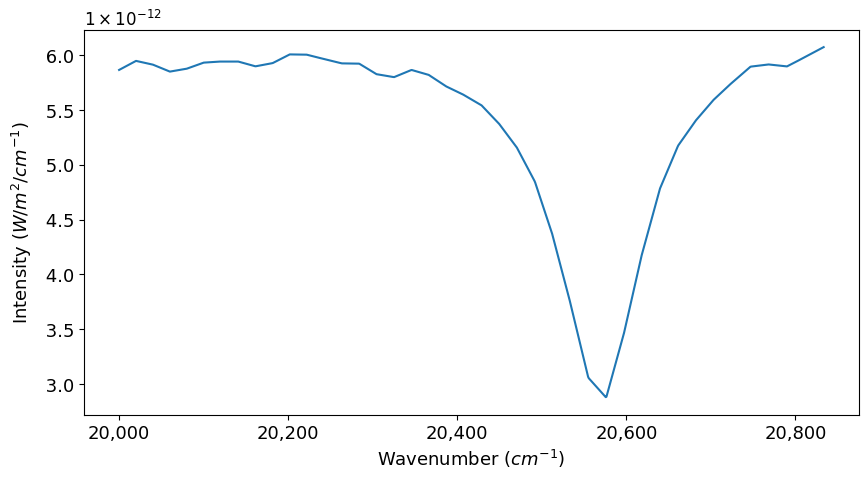

In [5]:
# the input spectrum

from matplotlib.ticker import ScalarFormatter, FuncFormatter

# Determine the order of magnitude
order_of_magnitude = int(np.floor(np.log10(max(ynew))))
scale_factor = 10 ** order_of_magnitude

# Create a figure and an axis
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
plt.xlabel('Wavenumber ($cm^{-1}$)', fontsize=13)
plt.ylabel('Intensity ($W/m^2/cm^{-1}$)',fontsize=13)
# Plot the data
ax.plot(xnew, ynew, '-')

# Set the y-tick labels manually
yticks = ax.get_yticks()
ax.set_yticklabels([f'{float(tick/scale_factor): .1f}' for tick in yticks])

# Set the x-ticks in thousands
def thousands_formatter(x, pos):
    return f'{int(x):,}'

# Apply the formatter to the x-axis
ax.xaxis.set_major_formatter(FuncFormatter(thousands_formatter))


plt.yticks(fontsize=13)
plt.xticks(fontsize=13)

# Place the order of magnitude in the top left corner
ax.annotate(f'$1 \\times 10^{{{order_of_magnitude}}}$', xy=(0, 1), xycoords='axes fraction', fontsize=12,
            horizontalalignment='left', verticalalignment='bottom')

# Show the plot
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_12908\3777255480.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{float(tick/scale_factor): .1f}' for tick in yticks])


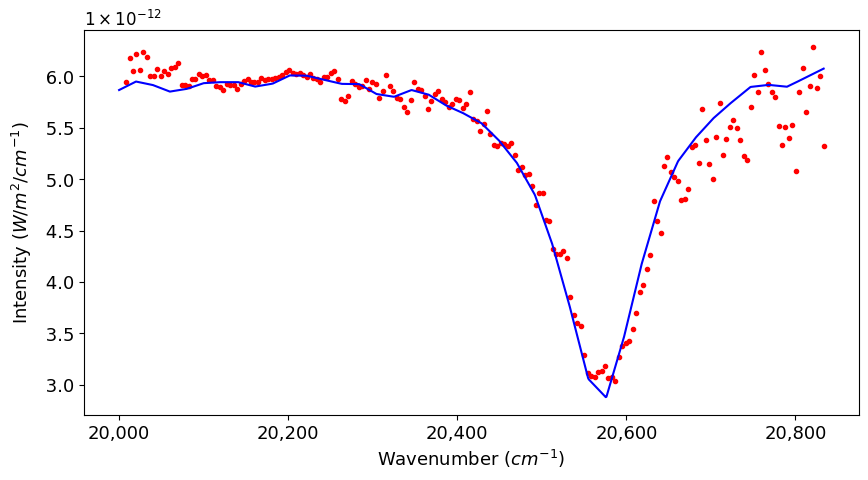

In [6]:
# the output spectrum

from matplotlib.ticker import ScalarFormatter, FuncFormatter

# Determine the order of magnitude
order_of_magnitude = int(np.floor(np.log10(max(L_final[2:]))))
scale_factor = 10 ** order_of_magnitude

# Create a figure and an axis
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
plt.xlabel('Wavenumber ($cm^{-1}$)', fontsize=13)
plt.ylabel('Intensity ($W/m^2/cm^{-1}$)',fontsize=13)
# Plot the data
ax.plot(k[2:], L_final[2:], '.r', label='retrieved and calibrated spectra')
ax.plot(K_og, y_corr_og, 'b', label='original spectra')

# Set the y-tick labels manually
yticks = ax.get_yticks()
ax.set_yticklabels([f'{float(tick/scale_factor): .1f}' for tick in yticks])

# Set the x-ticks in thousands
def thousands_formatter(x, pos):
    return f'{int(x):,}'

# Apply the formatter to the x-axis
ax.xaxis.set_major_formatter(FuncFormatter(thousands_formatter))


plt.yticks(fontsize=13)
plt.xticks(fontsize=13)

# Place the order of magnitude in the top left corner
ax.annotate(f'$1 \\times 10^{{{order_of_magnitude}}}$', xy=(0, 1), xycoords='axes fraction', fontsize=12,
            horizontalalignment='left', verticalalignment='bottom')

# Show the plot
plt.show()


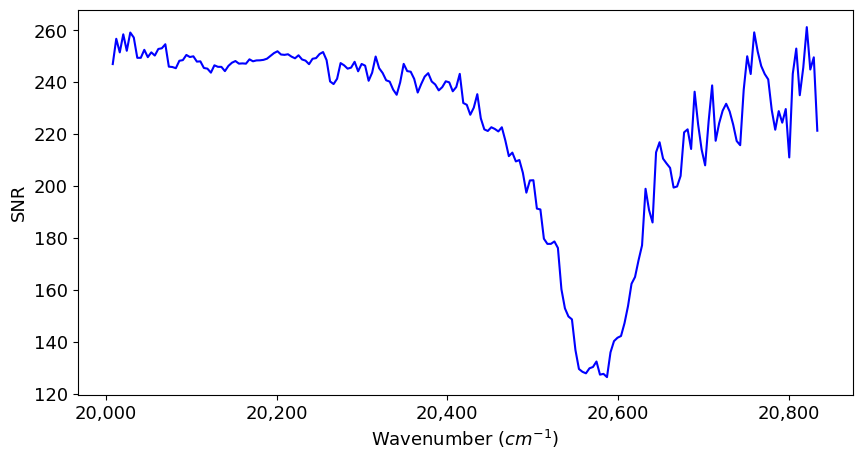

In [7]:
# the output spectrum

from matplotlib.ticker import ScalarFormatter, FuncFormatter


# Create a figure and an axis
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
plt.xlabel('Wavenumber ($cm^{-1}$)', fontsize=13)
plt.ylabel('SNR',fontsize=13)
# Plot the data
ax.plot(k[2:],SNR_spectral_array[2:], 'b')


# Set the x-ticks in thousands
def thousands_formatter(x, pos):
    return f'{int(x):,}'

# Apply the formatter to the x-axis
ax.xaxis.set_major_formatter(FuncFormatter(thousands_formatter))


plt.yticks(fontsize=13)
plt.xticks(fontsize=13)


# Show the plot
plt.show()


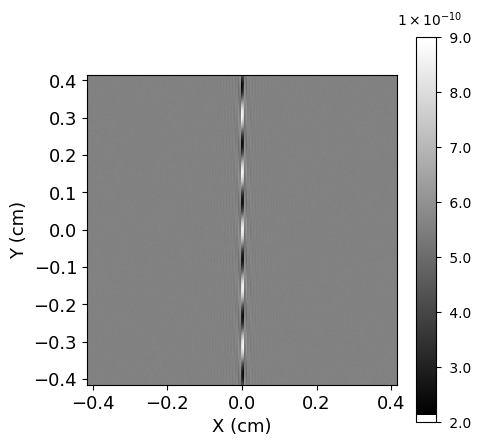

In [8]:
# interferogram


# Create the heatmap
fig, ax = plt.subplots()
fig.set_size_inches(5,5)
plt.xlabel('X (cm)', fontsize=13)
plt.ylabel('Y (cm)', fontsize=13)
cax = ax.imshow(i,extent=(x.min(), x.max(), x.min(), x.max()), origin='lower', cmap='gray')

# Add a colorbar
cbar = fig.colorbar(cax)

# Determine the order of magnitude
order_of_magnitude = int(np.floor(np.log10(np.max(i))))
scale_factor = 10 ** order_of_magnitude

# Set the colorbar tick labels manually
cbar_ticks = cbar.get_ticks()
cbar.set_ticks(cbar_ticks)
cbar.set_ticklabels([f'{float(tick/scale_factor): .1f}' for tick in cbar_ticks])

plt.yticks(fontsize=13)
plt.xticks(fontsize=13)


# Place the order of magnitude in the top left corner of the colorbar
ax.annotate(f'$1 \\times 10^{{{order_of_magnitude}}}$', xy=(1, 1.15), xycoords='axes fraction', fontsize=10,
            horizontalalignment='left', verticalalignment='bottom', transform=ax.transAxes)

# Show the plot
plt.show()


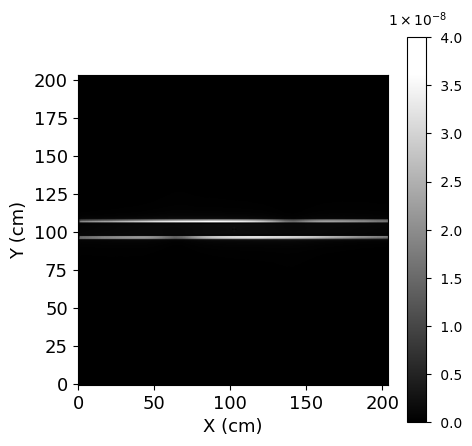

In [9]:
# interferogram


# Create the heatmap
fig, ax = plt.subplots()
fig.set_size_inches(5,5)
plt.xlabel('X (cm)', fontsize=13)
plt.ylabel('Y (cm)', fontsize=13)
cax = ax.imshow(ft, origin='lower', cmap='gray')

# Add a colorbar
cbar = fig.colorbar(cax)

# Determine the order of magnitude
order_of_magnitude = int(np.floor(np.log10(np.max(ft))))
scale_factor = 10 ** order_of_magnitude

# Set the colorbar tick labels manually
cbar_ticks = cbar.get_ticks()
cbar.set_ticks(cbar_ticks)
cbar.set_ticklabels([f'{float(tick/scale_factor): .1f}' for tick in cbar_ticks])

plt.yticks(fontsize=13)
plt.xticks(fontsize=13)


# Place the order of magnitude in the top left corner of the colorbar
ax.annotate(f'$1 \\times 10^{{{order_of_magnitude}}}$', xy=(1, 1.15), xycoords='axes fraction', fontsize=10,
            horizontalalignment='left', verticalalignment='bottom', transform=ax.transAxes)

# Show the plot
plt.show()
